# Importing required Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("E:\lec data science\machine learning\Bank_details.csv")

In [3]:
#This will gives first five element
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Introduction

Introduction :-

1. age -  age:age - (numeric)
2.job :job - type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-
3.marital :marital - marital status (categorical: "divorced","married","single","unknow")
4.education:education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
5.default:default- has credit in default? (categorical: "no","yes","unknown")
6.housing: housing-has housing loan? (categorical: "no","yes","unknown")
7.loan:loan- has personal loan? (categorical: "no","yes","unknown")
8.contact:contact- contact communication type (categorical: "cellular","telephone")
9.month:month-last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
10.day_of_week:day_of_week- last contact day of the week (categorical: "mon","tue","wed","thu","fri")
11.duration:duration- last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target
12.campaign:campaign-number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.pdays:pdays-number of days that passed by after the client was last contacted from a previous campaign.
14.previous:previous- number of contacts performed before this campaign and for this client (numeric)
15.poutcome:poutcome- outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
16.emp.var.rate:emp.var.rate- employment variation rate - quarterly indicator (numeric)
17.cons.price.idx:cons.price.idx- consumer price index - monthly indicator (numeric)
18.cons.conf.idx:cons.conf.idx- consumer confidence index - monthly indicator (numeric)
19.euribor3m:euribor3m- euribor 320 - nr.employed: number of employees - quarterly indicator (numeric)
20.nr.employed: nr.employed-number of employees - quarterly indicator (numeric)
output = 
 y - has the client subscribed a term deposit? (binary: "yes","no")


# EDA

In [4]:
#info()=This will gives information about column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# to check null value
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
#gives inforamtion about min,mqax,std in dataset 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [8]:
#row and column size
df.shape

(41188, 21)

In [9]:
#it will give unique characters from dataset
for i in df:
    print (i,":",df[i].unique())

age : [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital : ['married' 'single' 'divorced' 'unknown']
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default : ['no' 'unknown' 'yes']
housing : ['no' 'yes' 'unknown']
loan : ['no' 'yes' 'unknown']
contact : ['telephone' 'cellular']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']
duration : [ 261  149  226 ... 1246 1556 1868]
campaign : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37

In [10]:
#replace unknown with no
df.replace("unknown","no",inplace=True)

In [11]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [12]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Visualisation

In [13]:
import matplotlib.pyplot as plt

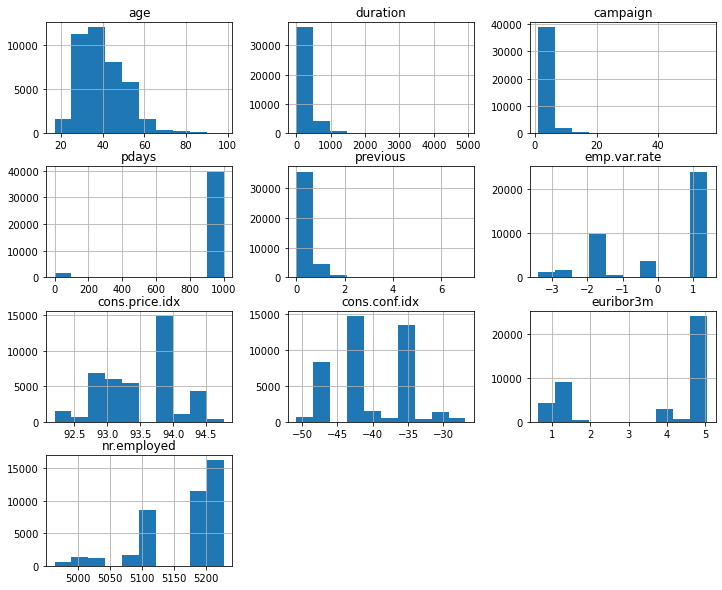

In [14]:
df.hist(figsize=(12, 10))
plt.show()


In [15]:
#To convert dataset into number
from sklearn.preprocessing import LabelEncoder

In [16]:
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [17]:
label_encoders

{'job': LabelEncoder(),
 'marital': LabelEncoder(),
 'education': LabelEncoder(),
 'default': LabelEncoder(),
 'housing': LabelEncoder(),
 'loan': LabelEncoder(),
 'contact': LabelEncoder(),
 'month': LabelEncoder(),
 'day_of_week': LabelEncoder(),
 'poutcome': LabelEncoder(),
 'y': LabelEncoder()}

In [18]:
X = df.drop('y', axis=1)


In [19]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,8,1,3,0,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,8,1,3,0,1,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,8,1,3,0,0,1,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [20]:
y = df['y']

In [21]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int32

In [22]:
#To split the dataset into training and testing samples
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
X_train.shape

(28831, 20)

In [25]:
y_train.shape

(28831,)

In [26]:
X_test.shape

(12357, 20)

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
# Create a LogisticRegression instance
lr = LogisticRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Evaluate the model's accuracy on the test data
accuracy = lr.score(X_test, y_test)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.9100105203528365


In [29]:
from sklearn.metrics import classification_report

y_pred=lr.predict(X_test)
y_pred
accuracy_score(y_test,y_pred)
cr=(classification_report(y_test,y_pred))
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10968
           1       0.66      0.41      0.51      1389

    accuracy                           0.91     12357
   macro avg       0.79      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



# Random forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier instance
rf = RandomForestClassifier()

# Train the model on the training data
rf.fit(X_train, y_train)

# Evaluate the model's accuracy on the test data
accuracy = rf.score(X_test, y_test)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.9140568099053168


In [31]:
from sklearn.metrics import classification_report

y_pred1=rf.predict(X_test)
y_pred1
accuracy_score(y_test,y_pred1)
cr=(classification_report(y_test,y_pred1))
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10968
           1       0.65      0.50      0.57      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.73      0.76     12357
weighted avg       0.91      0.91      0.91     12357



# using Hyper tuning parameter With the RandomForestClssifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier instance
rf = RandomForestClassifier(n_estimators=200,criterion='gini')

# Train the model on the training data
rf.fit(X_train, y_train)

# Evaluate the model's accuracy on the test data
accuracy = rf.score(X_test, y_test)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.9146232904426641


In [33]:
y_pred2=rf.predict(X_test)
y_pred2
accuracy_score(y_test,y_pred2)
cr=(classification_report(y_test,y_pred2))
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10968
           1       0.65      0.51      0.57      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.74      0.76     12357
weighted avg       0.91      0.91      0.91     12357



# Adaboost

In [34]:
from sklearn.ensemble import AdaBoostClassifier

# Define the AdaBoost classifier
boost = AdaBoostClassifier()

# Fit the model to the training data
boost.fit(X_train, y_train)

# Predict the labels for the test set
y_pred3= boost.predict(X_test)

# Calculate the accuracy score
accuracy_score(y_test, y_pred3)

print("Test Accuracy:", accuracy)
cr=(classification_report(y_test,y_pred3))
print(cr)

Test Accuracy: 0.9146232904426641
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10968
           1       0.66      0.40      0.50      1389

    accuracy                           0.91     12357
   macro avg       0.79      0.69      0.72     12357
weighted avg       0.90      0.91      0.90     12357



# using Hyper tuning parameter With the Adaboost

In [35]:
# Define the AdaBoost classifier with specified hyperparameters
boost = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)

# Fit the model to the training data
boost.fit(X_train, y_train)

# Predict the labels for the test set
y_pred4 = boost.predict(X_test)

# Calculate the accuracy score
accuracy_score(y_test, y_pred4)

print("Test Accuracy:", accuracy)
cr=(classification_report(y_test,y_pred4))
print(cr)

Test Accuracy: 0.9146232904426641
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10968
           1       0.67      0.30      0.42      1389

    accuracy                           0.90     12357
   macro avg       0.79      0.64      0.68     12357
weighted avg       0.89      0.90      0.89     12357



# GradientBoostingClassifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
# Create a GradientBoostingClassifier instance
xg = GradientBoostingClassifier()

# Train the model on the training data
xg.fit(X_train, y_train)

# Evaluate the model's accuracy on the test data
accuracy = xg.score(X_test, y_test)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.9185077284130453


In [37]:
y_pred5=xg.predict(X_test)
y_pred5
accuracy_score(y_test,y_pred5)
cr=(classification_report(y_test,y_pred5))
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10968
           1       0.69      0.51      0.58      1389

    accuracy                           0.92     12357
   macro avg       0.81      0.74      0.77     12357
weighted avg       0.91      0.92      0.91     12357



# using Hyper tuning parameter With the Gradient Boost classifier

In [38]:
# Define the Gradient Boosting classifier with specified hyperparameters
xg = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    subsample=0.8,
    max_features=0.8  # Changed "colsample_bytree" to "max_features"
)

# Fit the model to the training data
xg.fit(X_train, y_train)

# Predict the labels for the test set
y_pred6= xg.predict(X_test)

# Calculate the accuracy score
accuracy_score(y_test, y_pred6)

print("Test Accuracy:", accuracy)
cr=(classification_report(y_test,y_pred6))
print(cr)

Test Accuracy: 0.9185077284130453
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10968
           1       0.68      0.52      0.59      1389

    accuracy                           0.92     12357
   macro avg       0.81      0.75      0.77     12357
weighted avg       0.91      0.92      0.91     12357



# DecisionTreeClassifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
# Define the Decision Tree classifier
model = DecisionTreeClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred7 = model.predict(X_test)

# Calculate the accuracy score
accuracy_score(y_test, y_pred7)

print("Test Accuracy:", accuracy)
cr=(classification_report(y_test,y_pred7))
print(cr)

Test Accuracy: 0.9185077284130453
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10968
           1       0.52      0.54      0.53      1389

    accuracy                           0.89     12357
   macro avg       0.73      0.74      0.73     12357
weighted avg       0.89      0.89      0.89     12357



# SVC

In [40]:
from sklearn.svm import SVC
#create a support vector classification instance
svc = SVC()

# Train the model on the training data
svc.fit(X_train, y_train)

# Evaluate the model's accuracy on the test data
accuracy = svc.score(X_test, y_test)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.8970623937848993


In [41]:
from sklearn.metrics import classification_report

y_pred8=svc.predict(X_test)
y_pred8
accuracy_score(y_test,y_pred8)
cr=(classification_report(y_test,y_pred8))
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10968
           1       0.62      0.22      0.32      1389

    accuracy                           0.90     12357
   macro avg       0.76      0.60      0.63     12357
weighted avg       0.88      0.90      0.87     12357



# SVC using hyper tunning parameter

In [42]:
#Define the SVC with specified hyperparameters
svc = SVC(kernel='poly')

# Fit the model to the training data
svc.fit(X_train, y_train)

# Predict the labels for the test set
y_pred9= svc.predict(X_test)

# Calculate the accuracy score
accuracy_score(y_test, y_pred9)

print("Test Accuracy:", accuracy)
cr=(classification_report(y_test,y_pred9))
print(cr)

Test Accuracy: 0.8970623937848993
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10968
           1       0.62      0.22      0.32      1389

    accuracy                           0.90     12357
   macro avg       0.77      0.60      0.63     12357
weighted avg       0.88      0.90      0.87     12357



In [43]:
#checking all models accuracy
final_df = pd.DataFrame({'Models':['log_r','Randomforest','Randomforest_para','Adaboost','Adaboost_para','GradientBoost','GradientBoost_param','DescisionTreeClassifier','svc','svc_pr'],
                       'ACC':[accuracy_score(y_test,y_pred),
                              accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4),
                              accuracy_score(y_test,y_pred5),
                              accuracy_score(y_test,y_pred6),
                              accuracy_score(y_test,y_pred7),
                              accuracy_score(y_test,y_pred8),
                               accuracy_score(y_test,y_pred9)
                            
                              
    
]})
final_df

,Models,ACC
0,log_r,0.910011
1,Randomforest,0.914057
2,Randomforest_para,0.914623
3,Adaboost,0.909525
4,Adaboost_para,0.904993
5,GradientBoost,0.918508
6,GradientBoost_param,0.918831
7,DescisionTreeClassifier,0.892126
8,svc,0.897062
9,svc_pr,0.897143


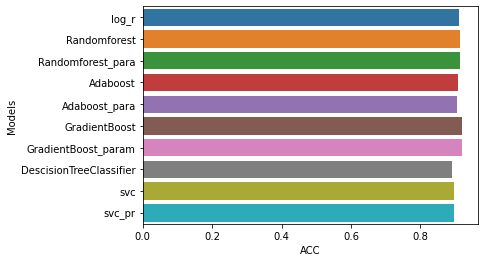

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(y='Models', x='ACC', data=final_df, orient='h')
plt.show()